In [2]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import requests

# Import the API key.
from config import weather_api_key

# Build the basic URL for OpenWeatherMap
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the time library and the datetime module from the datetime library
import time

from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

85.26255563690341 -45.69452997218653
25.902096161887357 4.0090069507313615
-42.11139316997056 -35.10808379529493
-40.31964377429914 87.79127098480188
0.3651050499681219 -70.49766198900258
-80.14993091796536 -15.257028244271709
18.766265096169533 88.86451955702097
-79.3685956060043 -167.58436666737813
70.71433976806082 137.85337356205514
36.9771360094697 99.57587739539645
-89.00323031999324 -149.235899415012
-15.280442205648114 -156.7576205247826
45.85457161604191 110.60064390954534
50.58771021281348 -173.12809527190635
-54.153451594123666 50.53531039006765
-64.23335882604869 165.39626540602973
59.84068171577036 -33.86014217983674
59.6508375596741 -2.054235396534125
-54.07948706807108 -61.19182864701061
33.20892056078873 -58.83923732603972
8.012781111683282 142.06079671363887
66.25463916586088 -170.87885201041007
82.58665639812867 32.202381038439654
-85.66264358169946 -62.20421764393059
-44.384802741270676 81.67178131068675
44.438574976961604 -8.454433375062337
-54.34364143212353 155.30

In [6]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy

In [7]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then  we will add it to the cities list.
    if city not in cities:
        cities.append(city)
    
#Print the city count to confirm sufficient count.
len(cities)

611

In [8]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.
print("Beginning Date Retrieval     ")
print("-----------------------------")

# Create the counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.

for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        record_count =1
        time.sleep(60)
        
    
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.

    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        
        pass
    
# Indicate the Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Date Retrieval     
-----------------------------
Processing Record 1 of Set 1 | upernavik
Processing Record 2 of Set 1 | adrar
Processing Record 3 of Set 1 | cidreira
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | mitu
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | paradwip
City not found. Skipping...
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | zhangye
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | darhan
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | sandwick
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | airai
Processing Rec

Processing Record 39 of Set 4 | puerto colombia
Processing Record 40 of Set 4 | ankpa
Processing Record 41 of Set 4 | nokaneng
Processing Record 42 of Set 4 | port augusta
Processing Record 43 of Set 4 | marcona
City not found. Skipping...
Processing Record 44 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 45 of Set 4 | kieta
Processing Record 46 of Set 4 | bathsheba
Processing Record 47 of Set 4 | chauk
Processing Record 48 of Set 4 | khandyga
Processing Record 49 of Set 4 | pevek
Processing Record 50 of Set 4 | abu kamal
Processing Record 1 of Set 5 | solnechnyy
Processing Record 2 of Set 5 | fortuna
Processing Record 3 of Set 5 | tiksi
Processing Record 4 of Set 5 | tual
Processing Record 5 of Set 5 | geraldton
Processing Record 6 of Set 5 | ulladulla
Processing Record 7 of Set 5 | cortes
Processing Record 8 of Set 5 | vallenar
Processing Record 9 of Set 5 | dunedin
Processing Record 10 of Set 5 | saint anthony
Processing Record 11 of Set 5 | oga
Processing Record

Processing Record 28 of Set 8 | iqaluit
Processing Record 29 of Set 8 | barabinsk
Processing Record 30 of Set 8 | saint-georges
Processing Record 31 of Set 8 | sorland
Processing Record 32 of Set 8 | portland
Processing Record 33 of Set 8 | sarmanovo
Processing Record 34 of Set 8 | zyryanka
Processing Record 35 of Set 8 | tonstad
Processing Record 36 of Set 8 | koboldo
City not found. Skipping...
Processing Record 37 of Set 8 | pundaguitan
Processing Record 38 of Set 8 | yarim
Processing Record 39 of Set 8 | constitucion
Processing Record 40 of Set 8 | shahreza
Processing Record 41 of Set 8 | sorong
Processing Record 42 of Set 8 | campobasso
Processing Record 43 of Set 8 | pisco
Processing Record 44 of Set 8 | reconquista
Processing Record 45 of Set 8 | svetlyy
Processing Record 46 of Set 8 | kaitangata
Processing Record 47 of Set 8 | sinegorye
Processing Record 48 of Set 8 | port-de-bouc
Processing Record 49 of Set 8 | russell
Processing Record 50 of Set 8 | chagda
City not found. Ski

Processing Record 16 of Set 12 | guayaramerin
Processing Record 17 of Set 12 | hay river
Processing Record 18 of Set 12 | myaundzha
Processing Record 19 of Set 12 | nanakuli
Processing Record 20 of Set 12 | opuwo
Processing Record 21 of Set 12 | ballina
Processing Record 22 of Set 12 | damara
Processing Record 23 of Set 12 | curup
Processing Record 24 of Set 12 | filimonovo
Processing Record 25 of Set 12 | lata
Processing Record 26 of Set 12 | mandan
Processing Record 27 of Set 12 | jega
Processing Record 28 of Set 12 | maloy
Processing Record 29 of Set 12 | talara
Processing Record 30 of Set 12 | jiddah
City not found. Skipping...
Processing Record 31 of Set 12 | yatou
Processing Record 32 of Set 12 | faya
Processing Record 33 of Set 12 | goksun
Processing Record 34 of Set 12 | nanlong
Processing Record 35 of Set 12 | khorramshahr
Processing Record 36 of Set 12 | omboue
Processing Record 37 of Set 12 | hirara
Processing Record 38 of Set 12 | port moresby
Processing Record 39 of Set 12

In [14]:
len(city_data)

559

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Upernavik,72.7868,-56.1549,-20.29,98,100,6.04,GL,2023-01-10 13:53:47
1,Adrar,20.5022,-10.0711,72.79,10,100,15.50,MR,2023-01-10 13:53:48
2,Cidreira,-30.1811,-50.2056,77.32,67,74,11.65,BR,2023-01-10 13:53:48
3,Busselton,-33.6500,115.3333,65.12,73,45,13.67,AU,2023-01-10 13:53:48
4,Mitu,1.1983,-70.1733,82.29,68,75,2.33,CO,2023-01-10 13:53:49
5,Cape Town,-33.9258,18.4232,81.12,46,20,11.50,ZA,2023-01-10 13:50:01
6,Vaini,-21.2000,-175.2000,80.76,89,75,3.44,TO,2023-01-10 13:53:50
7,Zhangye,38.9342,100.4517,29.23,28,6,4.63,CN,2023-01-10 13:53:50
8,Mataura,-46.1927,168.8643,56.08,100,91,1.90,NZ,2023-01-10 13:53:51
9,Faanui,-16.4833,-151.7500,76.69,84,100,5.84,PF,2023-01-10 13:53:51


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2023-01-10 13:53:47,72.7868,-56.1549,-20.29,98,100,6.04
1,Adrar,MR,2023-01-10 13:53:48,20.5022,-10.0711,72.79,10,100,15.50
2,Cidreira,BR,2023-01-10 13:53:48,-30.1811,-50.2056,77.32,67,74,11.65
3,Busselton,AU,2023-01-10 13:53:48,-33.6500,115.3333,65.12,73,45,13.67
4,Mitu,CO,2023-01-10 13:53:49,1.1983,-70.1733,82.29,68,75,2.33
5,Cape Town,ZA,2023-01-10 13:50:01,-33.9258,18.4232,81.12,46,20,11.50
6,Vaini,TO,2023-01-10 13:53:50,-21.2000,-175.2000,80.76,89,75,3.44
7,Zhangye,CN,2023-01-10 13:53:50,38.9342,100.4517,29.23,28,6,4.63
8,Mataura,NZ,2023-01-10 13:53:51,-46.1927,168.8643,56.08,100,91,1.90
9,Faanui,PF,2023-01-10 13:53:51,-16.4833,-151.7500,76.69,84,100,5.84


In [17]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.

lats= city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

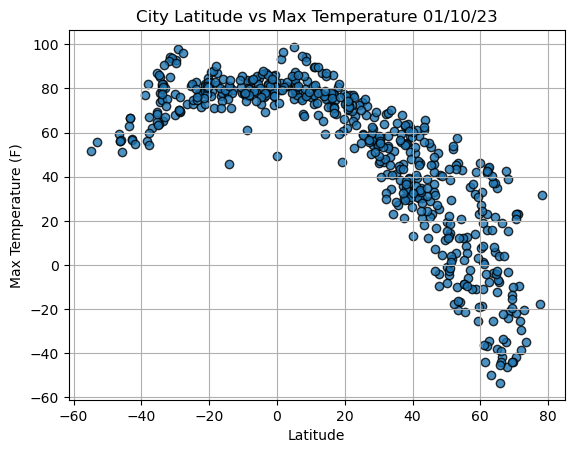

In [20]:
# Import the time module
import time

# Build the scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

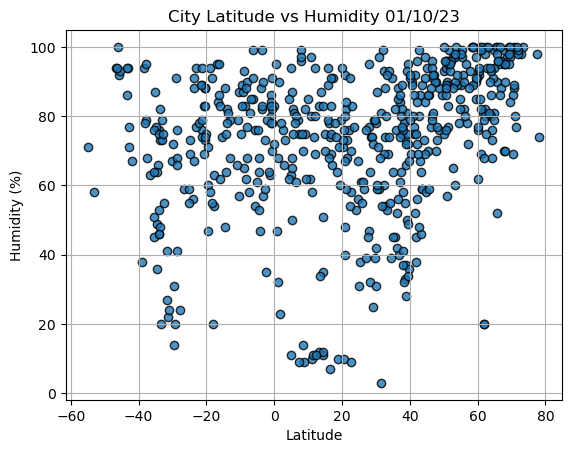

In [22]:
# Build the scatter plot for latitude vs humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

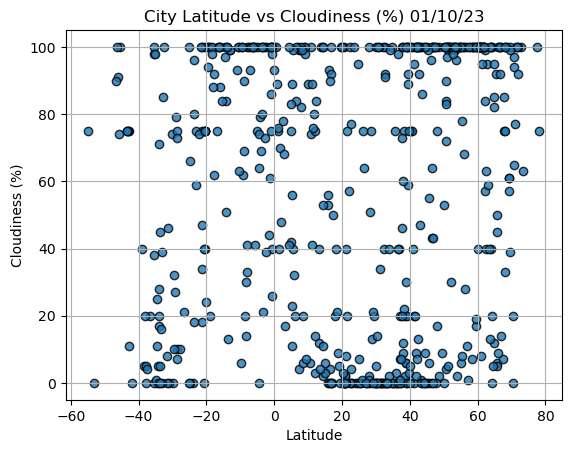

In [23]:
# Build the scatter plot for latitude vs cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

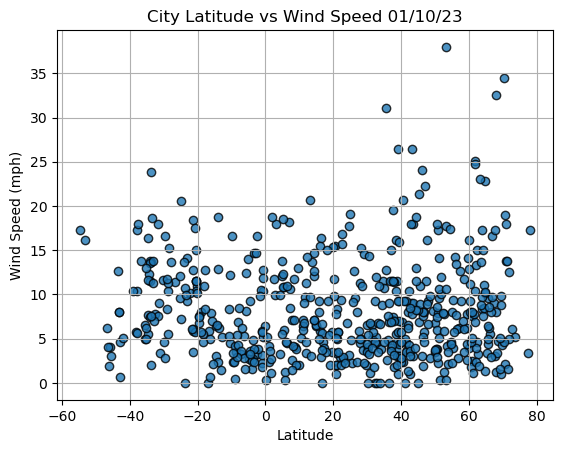

In [24]:
# Build the scatter plot for latitude vs wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values,y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                     Tasiilaq
Country                        GL
Date          2023-01-10 13:53:53
Lat                       65.6145
Lng                      -37.6368
Max Temp                     3.88
Humidity                       52
Cloudiness                      6
Wind Speed                   4.41
Name: 13, dtype: object

In [35]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
554     True
555     True
556     True
557    False
558     True
Name: Lat, Length: 559, dtype: bool

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2023-01-10 13:53:47,72.7868,-56.1549,-20.29,98,100,6.04
1,Adrar,MR,2023-01-10 13:53:48,20.5022,-10.0711,72.79,10,100,15.50
4,Mitu,CO,2023-01-10 13:53:49,1.1983,-70.1733,82.29,68,75,2.33
7,Zhangye,CN,2023-01-10 13:53:50,38.9342,100.4517,29.23,28,6,4.63
10,Darhan,MN,2023-01-10 13:53:52,49.4867,105.9228,11.34,86,9,8.08


In [37]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

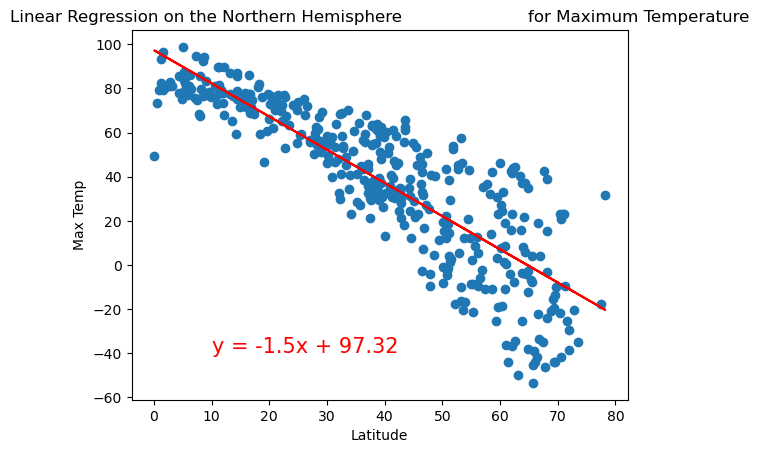

The r-value is: -0.854


In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,-40))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(f"The r-value is: {r_value:.3f}")

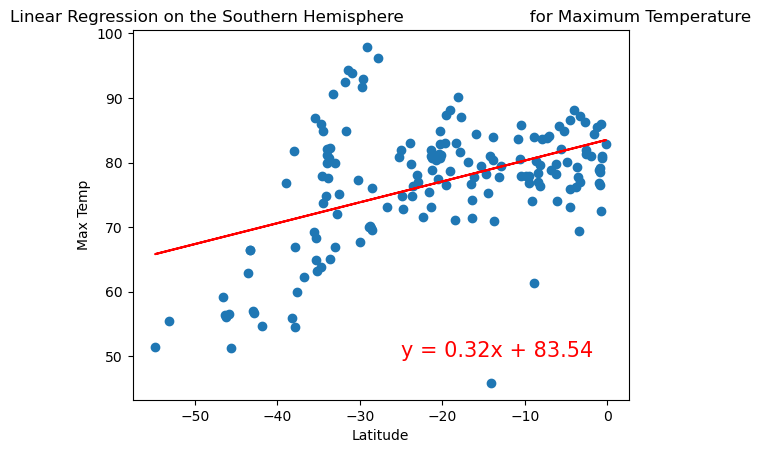

The r-value is: 0.464


In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-25,50))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(f"The r-value is: {r_value:.3f}")

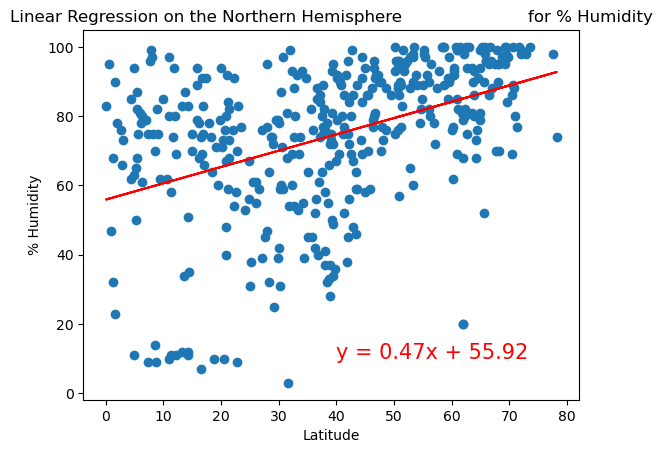

The r-value is: 0.426


In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for % Humidity', '% Humidity',(40,10))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(f"The r-value is: {r_value:.3f}")

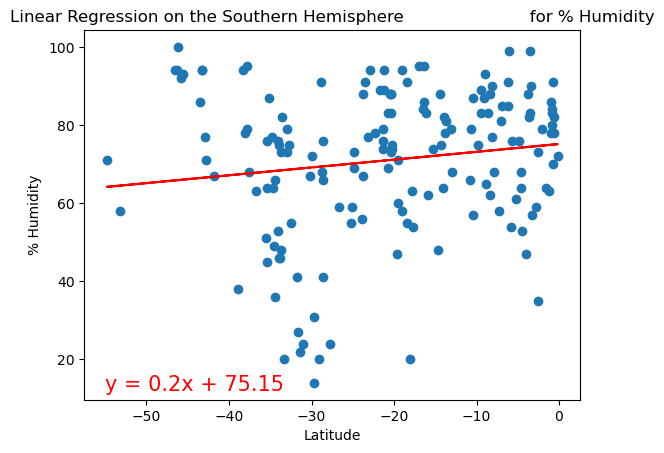

The r-value is: 0.145


In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-55,12))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(f"The r-value is: {r_value:.3f}")

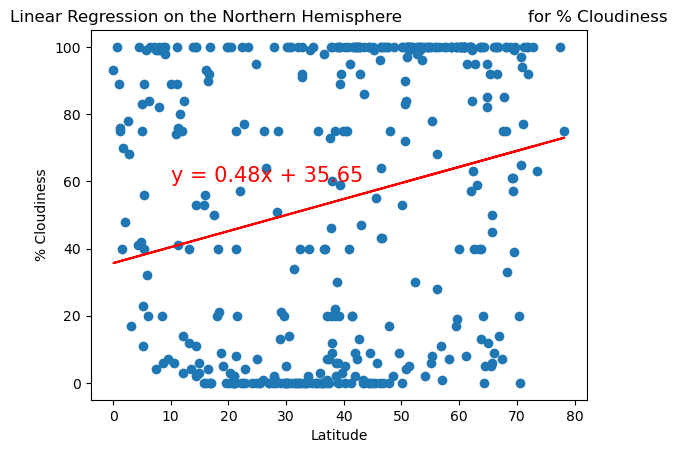

The r-value is: 0.225


In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(10,60))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(f"The r-value is: {r_value:.3f}")

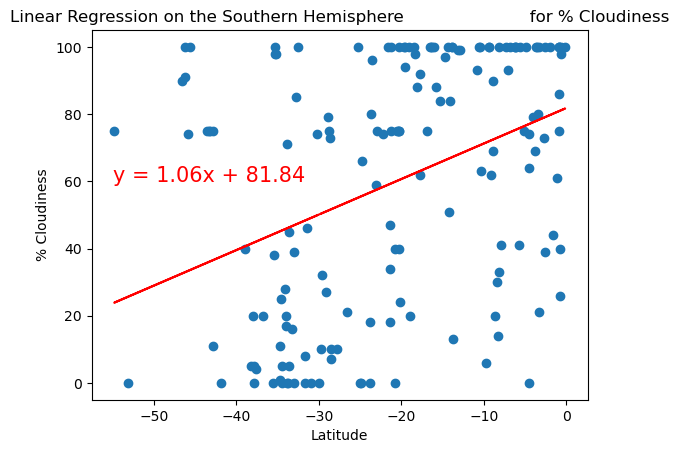

The r-value is: 0.382


In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-55,60))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(f"The r-value is: {r_value:.3f}")

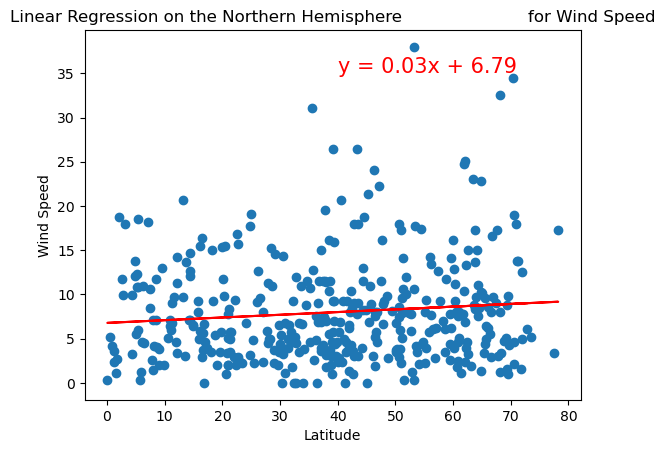

The r-value is: 0.103


In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(f"The r-value is: {r_value:.3f}")

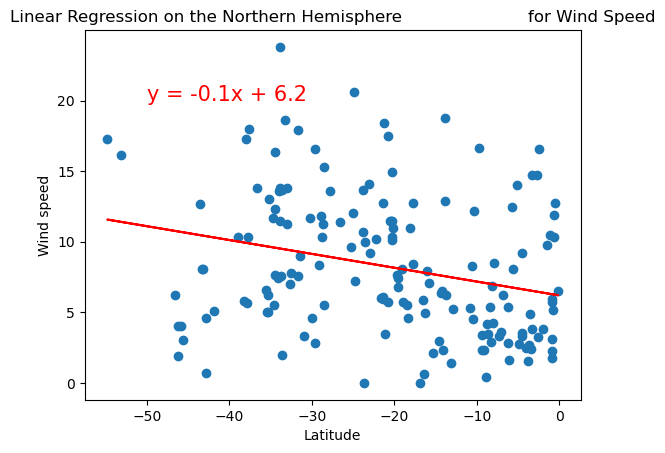

The r-value is: -0.269


In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind speed',(-50,20))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(f"The r-value is: {r_value:.3f}")